# 3D test case: Baroclinic Instability

In [40]:
import h5py
import numpy as np
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('classic')
%matplotlib inline

import converter
from importlib import reload
reload(converter)

<module 'converter' from '/home/ray/git-projects/RKLM_Reference/visualiser_debugger/converter.py'>

In [36]:
#####################################################
#
# Time labels for C and Python
#

t_label = '006'
label = t_label + '_' + 'ic'

label = t_label + '_' + 'before_advect'
label = t_label + '_' + 'after_advect'
label = t_label + '_' + 'after_ebnaexp'
label = t_label + '_' + 'after_ebnaimp'
# label = t_label + '_' + 'after_half_step'
# label = t_label + '_' + 'after_efna'
# label = t_label + '_' + 'after_full_advect'
# label = t_label + '_' + 'after_full_ebnaexp'
label = t_label + '_' + 'after_full_step'

# t_label = '038'
# time = t_label + '_' + 'after_full_step'
time = label
# #
#####################################################

#####################################################
#
# C-output folder names
#
base_suffix = '_baroclinic_instability_periodic/'
# 
#####################################################
#
# and its filename
#
# py_filename = "output_acoustic_wave_high_low_mach_gravity_comp.h5"
# py_filename = "output_internal_long_wave_low_mach_gravity_comp.h5"
# py_filename = "output_travelling_vortex_3d_48_low_mach_gravity_comp.h5"

#####################################################

figsize_tuple = (12,3)

In [42]:
base_folder_name = "../RKLM_Reference/output"

base_path = base_folder_name + base_suffix
folder_comp = "low_Mach_gravity_comp/"
folder_psinc = "low_Mach_gravity_psinc/"

# Manually list the folder names for each odirectories += [utput
directories = ['rho']
directories += ['S']
directories += ['T']
directories += ['Y']
directories += ['buoy']
directories += ['dT'] 
directories += ['dY']
directories += ['dp2_c']
directories += ['dp2_nodes']
directories += ['dpdim']
directories += ['drhoY'] 
directories += ['p']
directories += ['p2_c']
directories += ['p2_nodes']
directories += ['u']
directories += ['v']
directories += ['w']
directories += ['vortz']
directories += ['rhoY']
directories += ['rhoe']
directories += ['rhou']
directories += ['rhov']
directories += ['rhow']
directories += ['rhs']
directories += ['buoy']

# And manually list the file names.
filenames = ['rho']
filenames += ['S'] 
filenames += ['T']
filenames += ['Y']
filenames += ['buoy']
filenames += ['dT']
filenames += ['dY']
filenames += ['dp2_c']
filenames += ['dp2_n']
filenames += ['dpdim']
filenames += ['drhoY'] 
filenames += ['p']
filenames += ['p2_c']
filenames += ['p2_n']
filenames += ['u']
filenames += ['v']
filenames += ['w']
filenames += ['vortz']
filenames += ['rhoY']
filenames += ['rhoe']
filenames += ['rhou']
filenames += ['rhov']
filenames += ['rhow']
filenames += ['rhs']
filenames += ['buoy']

converter_obj = converter.convert(base_path,folder_comp,time,t_label)
converter_obj.convert_files(directories,filenames)

../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/rho/rho_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/S/S_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/T/T_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/Y/Y_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/buoy/buoy_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/dT/dT_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/dY/dY_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/dp2_c/dp2_c_006_after_full_step.hdf
../RKLM_Reference/output_baroclinic_instability_periodic/low_Mach_gravity_comp/dp2_nodes/dp2_n_006_after_full_step.hdf
../

In [45]:
# manually specific folder names
test_cases_folders = ['p2_nodes']
test_cases_folders += ['rho']
test_cases_folders += ['rhoY']
test_cases_folders += ['rhoe']
test_cases_folders += ['rhou']
test_cases_folders += ['rhov']
test_cases_folders += ['rhow']
test_cases_folders += ['u']
test_cases_folders += ['v']
test_cases_folders += ['vortz']
test_cases_folders += ['dT'] 
test_cases_folders += ['Y']
test_cases_folders += ['dY']
# test_cases_folders += ['rhs']
test_cases_folders += ['buoy']

# and filenames
test_cases_names = ['p2_n']
test_cases_names += ['rho']
test_cases_names += ['rhoY']
test_cases_names += ['rhoe']
test_cases_names += ['rhou']
test_cases_names += ['rhov']
test_cases_names += ['rhow']
test_cases_names += ['u']
test_cases_names += ['v']
test_cases_names += ['vortz']
test_cases_names += ['dT']
test_cases_names += ['Y']
test_cases_names += ['dY']
# test_cases_names += ['rhs']
test_cases_names += ['buoy']

c = converter_obj.get_converted_files(test_cases_folders, test_cases_names)

[[1.0787445  1.0787445  1.0787445  ... 1.0787445  1.0787445  1.0787445 ]
 [1.0257374  1.0257374  1.0257374  ... 1.0257374  1.0257374  1.0257374 ]
 [1.1298164  1.1298164  1.1298164  ... 1.1298164  1.1298164  1.1298164 ]
 ...
 [0.08881341 0.08881341 0.08881341 ... 0.08881341 0.08881341 0.08881341]
 [0.12805143 0.12805143 0.12805143 ... 0.12805143 0.12805143 0.12805143]
 [0.11801481 0.11801481 0.11801481 ... 0.11801481 0.11801481 0.11801481]]


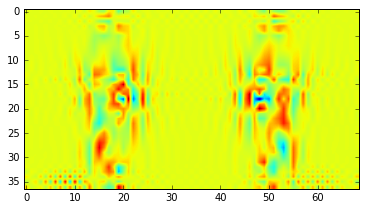

In [49]:
print(c.rho[10])
plt.figure()
plt.imshow(c.rhov[10])
plt.show()